## FUNZIONI UTILI PER LA VISUALIZZAZIONE DEI RISULTATI

In [1]:
def grafico_2d(embedding, node_ids, G):
    
    grafo = True
    if G is None:
        grafo = False
    
    if grafo:        
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))
        ax0 = axes[0]
    else:
        fig, ax0 = plt.subplots(1, figsize=(13, 7))
    
    for i, (x, y) in zip(node_ids, embedding):
        ax0.scatter(x, y, color="red")
        ax0.text(x + 0.01, y + 0.01, str(i), fontsize=9)
    
    if grafo:
        nx.draw(G, ax=axes[1], with_labels=True, node_color="grey",
        node_size=500, font_size=10, edge_color='red')
        axes[1].set_title("Grafo corrispettivo")

    plt.tight_layout()
    plt.show()
    
def club_2d(embedding, node_ids, G):
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    colors = []
    for i, (x, y) in zip(node_ids, embedding):
        club = G.nodes[i]['club']
        color = 'red' if club == 'Mr. Hi' else 'blue'
        axes[0].scatter(x, y, color=color)
        axes[0].text(x + 0.02, y + 0.02, str(i), fontsize=9)
        colors.append(color)
    axes[0].set_title("Node2Vec embedding del grafo")
    axes[0].grid(True)
    
    nx.draw(G, ax=axes[1], with_labels=True, node_color=colors,
    node_size=500, font_size=10, edge_color='grey')
    axes[1].set_title("Grafo del club di karate")

    plt.tight_layout()
    plt.show()

In [8]:
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx

# Grafo minuscolo per prime prove
"""
G = nx.Graph()

edges = [
    (0, 1), (1, 2), (2, 3), (3, 4), 
    (2, 6), 
    (6, 7), (7, 8), (8, 9), 
    (7, 5)
    
]
G.add_edges_from(edges)
"""

G = nx.karate_club_graph()

# Crea i walk con Node2Vec
dim = 6
node2vec = Node2Vec(G, dimensions=dim, walk_length=20, num_walks=50, workers=1, p=1, q=1)

# Crea embeddings con gensim Word2Vec
walks = node2vec.walks
model = Word2Vec(sentences=walks, vector_size=dim, window=10, min_count=1, sg=1, seed=55)

node_ids = list(G.nodes())
node_embeddings = [model.wv[str(n)] for n in node_ids]

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 103.21it/s]


# Utilizzando come dimensione del vettore di embedding 2

# Su grafo piccolo

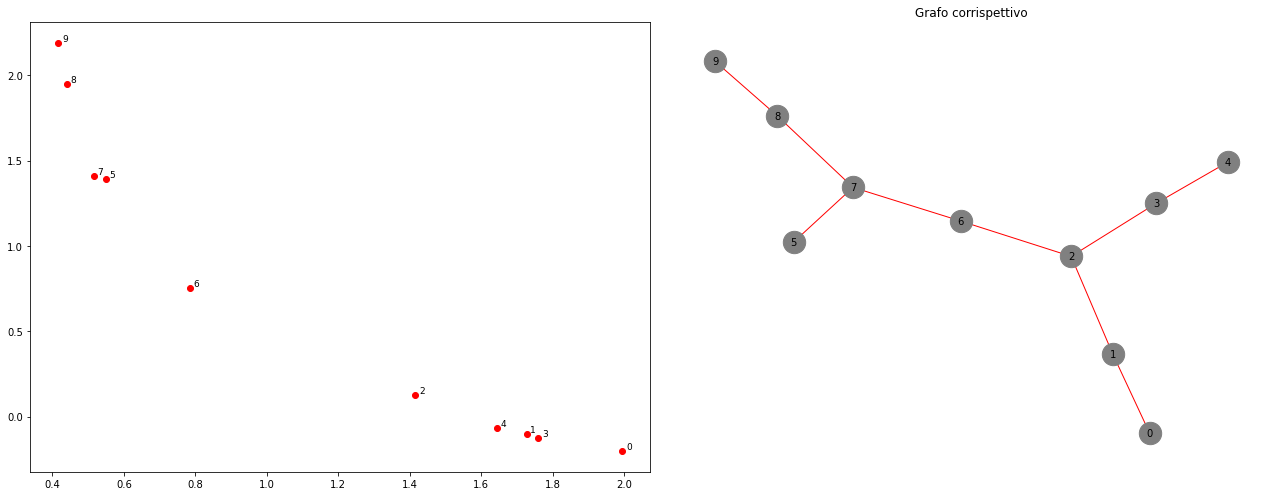

In [9]:
grafico_2d(node_embeddings, node_ids, G)

# Su grafo di karate

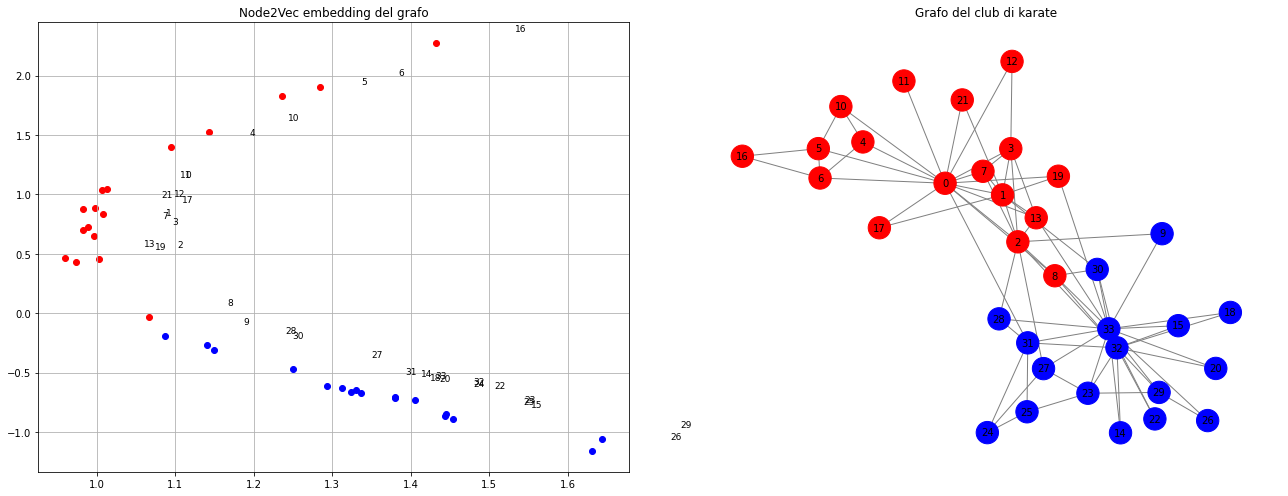

In [3]:
club_2d(node_embeddings, node_ids, G)

# Ora usando maggiore dimensionalità e poi riducendo con t-SNE e PCA

# Grafo del club di karate (34 nodi)
# Con p=1 e q=1

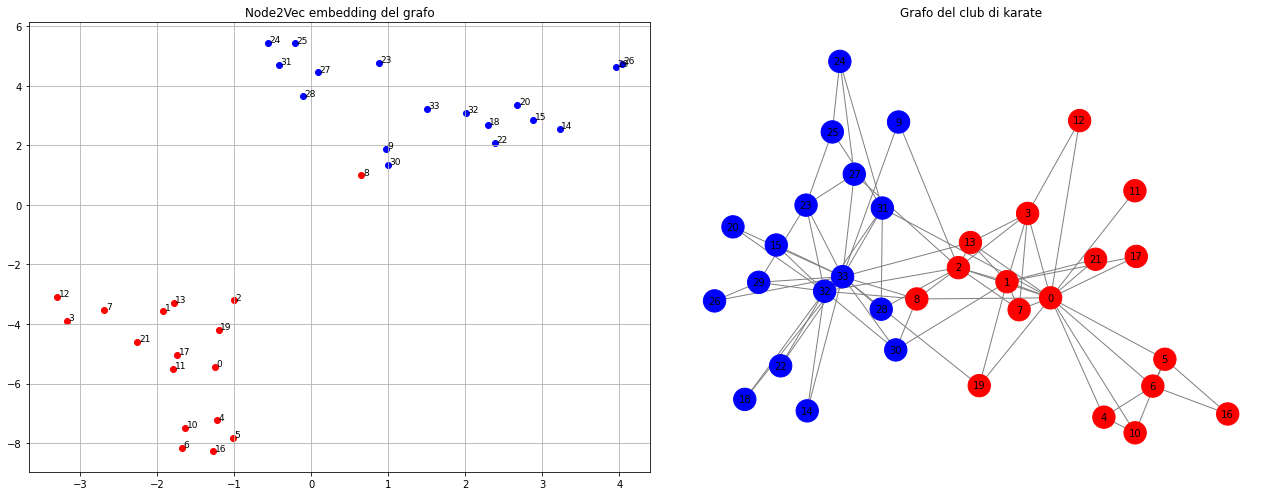

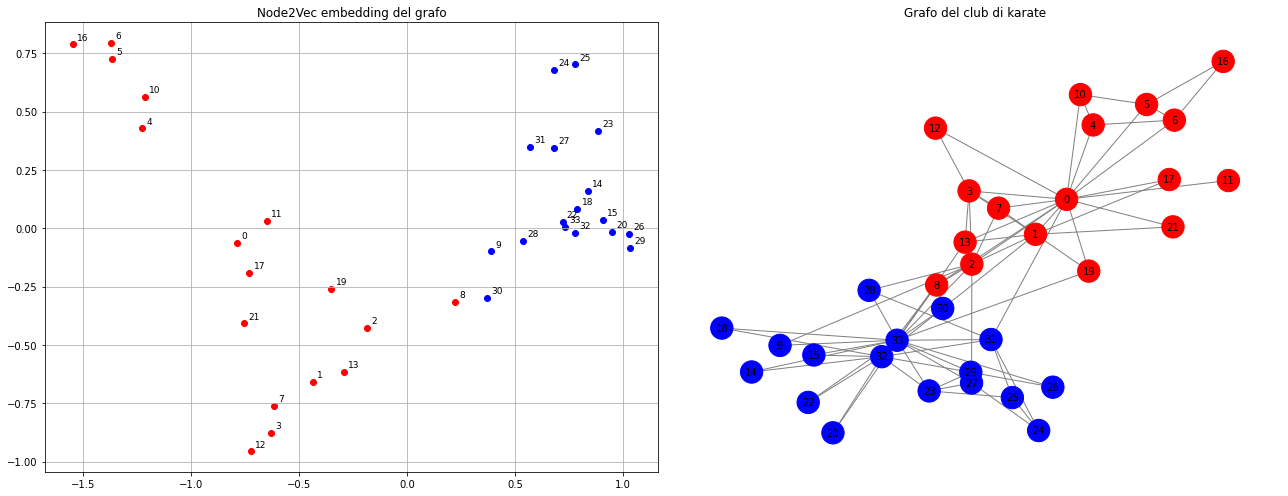

In [16]:
# Riduzione a 2D con TSNE e PCA per visualizzazione
tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(node_embeddings)/3))
embeddings_tsne = tsne.fit_transform(np.array(node_embeddings))

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(node_embeddings)


club_2d(embeddings_tsne, node_ids, G)
club_2d(embeddings_pca, node_ids, G)

# Con p=1 e q=0.5

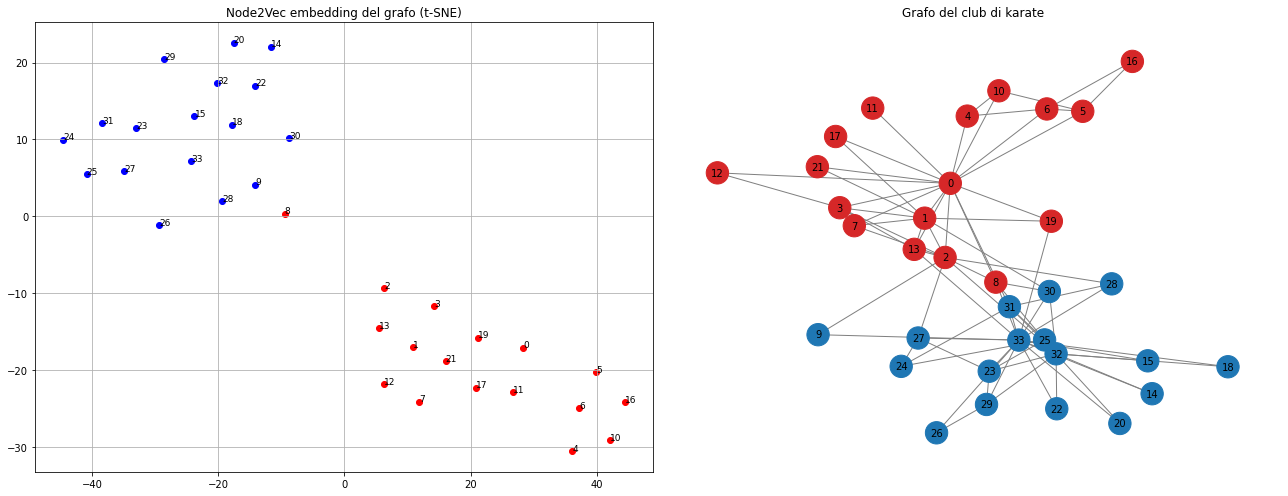

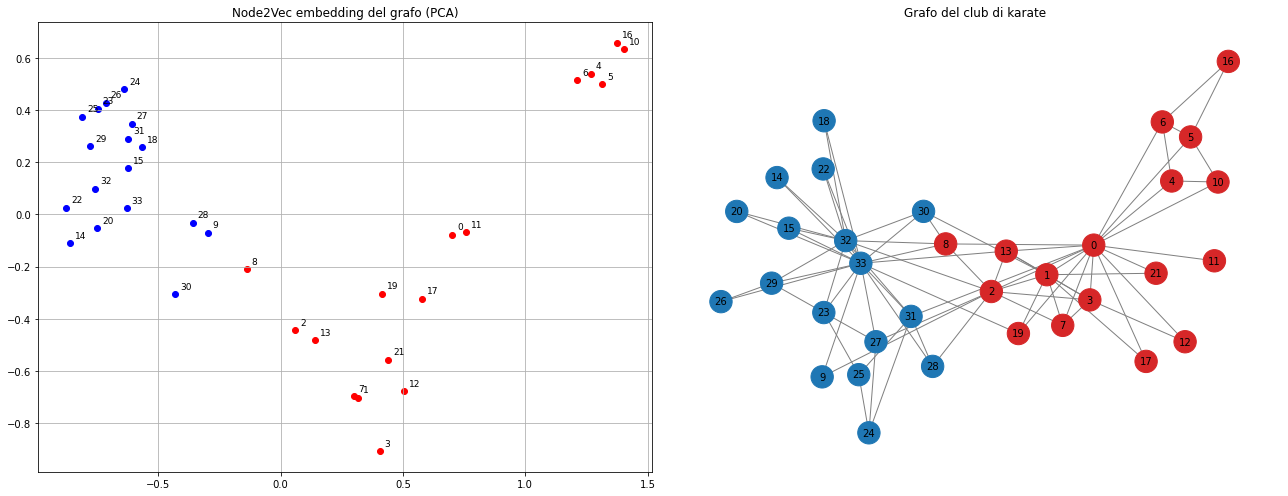

In [54]:
# Riduzione a 2D con TSNE e PCA per visualizzazione
tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(node_embeddings)/3))
embeddings_tsne = tsne.fit_transform(np.array(node_embeddings))

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(node_embeddings)


club_2d(embeddings_tsne, node_ids, G)
club_2d(embeddings_pca, node_ids, G)

# Con p=1 e q=3

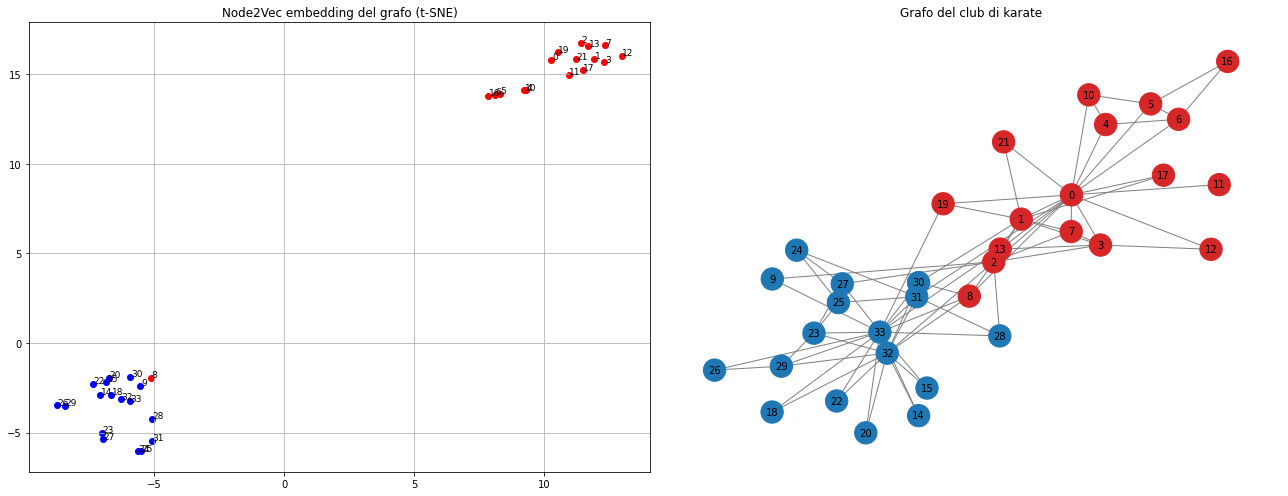

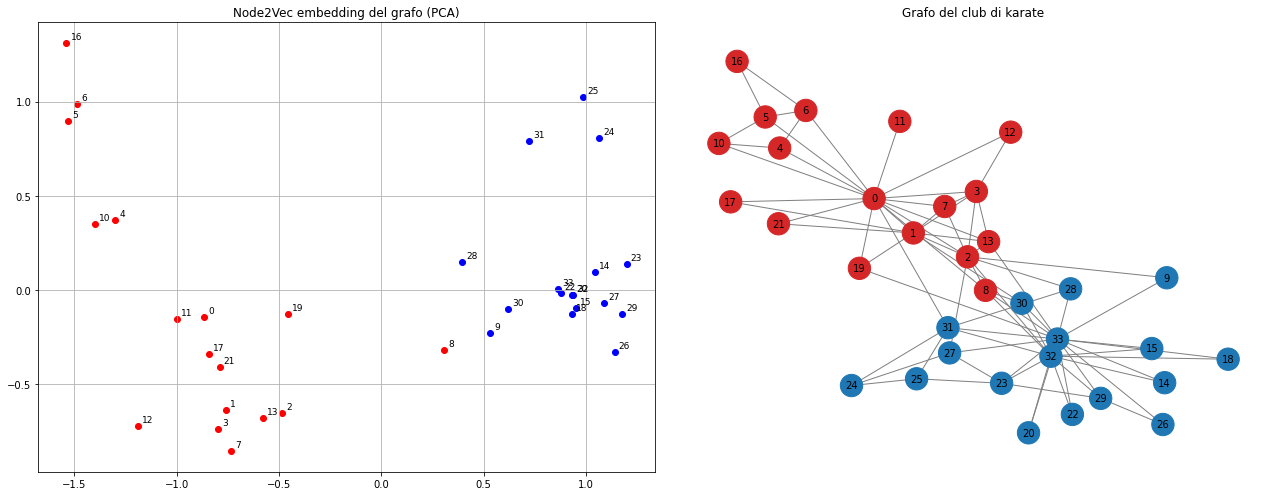

In [61]:
# Riduzione a 2D con TSNE e PCA per visualizzazione
tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(node_embeddings)/3))
embeddings_tsne = tsne.fit_transform(np.array(node_embeddings))

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(node_embeddings)


club_2d(embeddings_tsne, node_ids, G)
club_2d(embeddings_pca, node_ids, G)

# Con p=2 e q=1

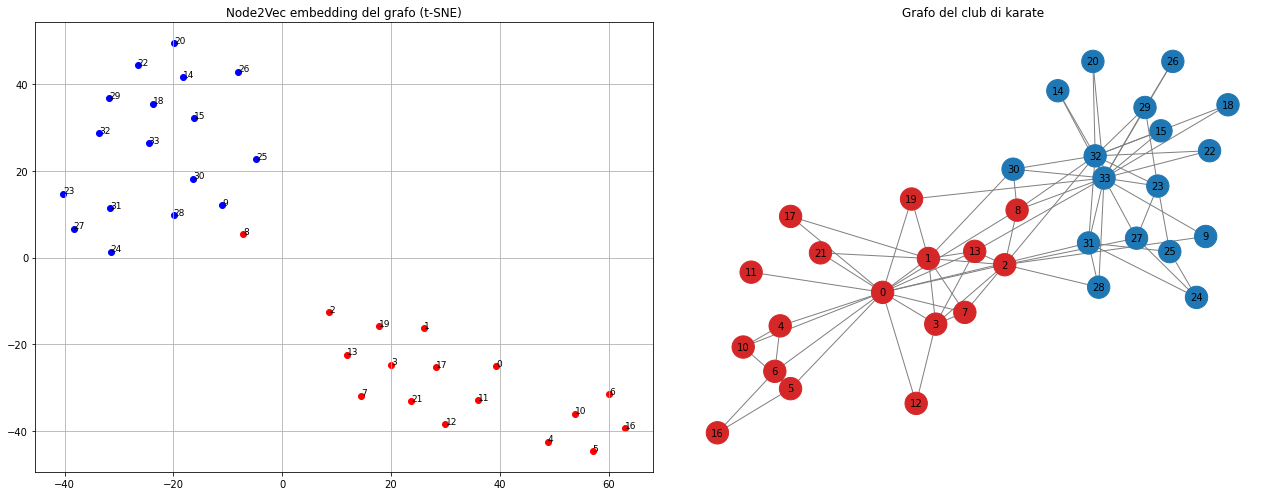

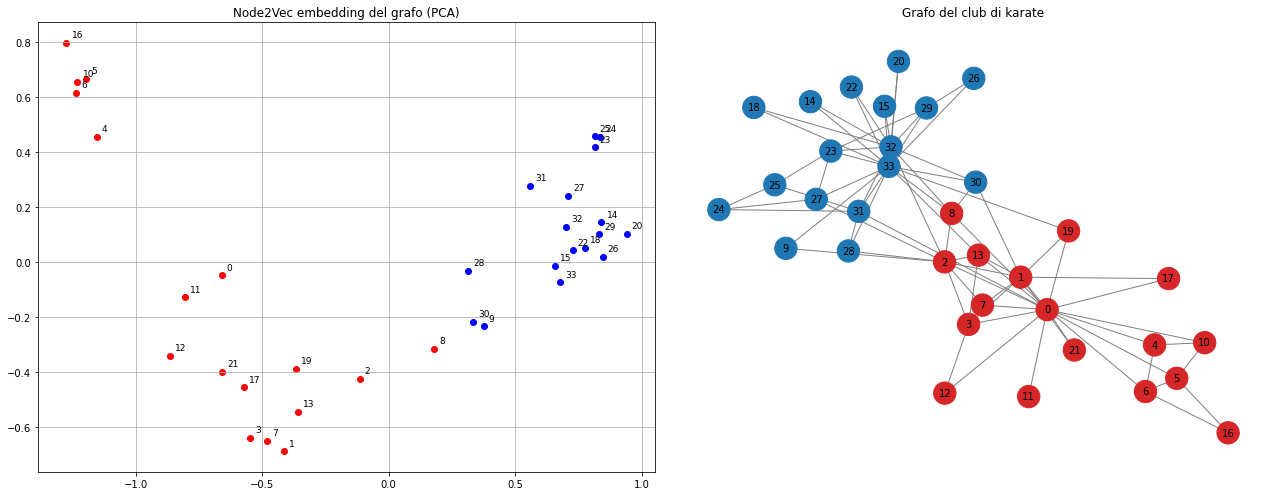

In [68]:
# Riduzione a 2D con TSNE e PCA per visualizzazione
tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(node_embeddings)/3))
embeddings_tsne = tsne.fit_transform(np.array(node_embeddings))

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(node_embeddings)


club_2d(embeddings_tsne, node_ids, G)
club_2d(embeddings_pca, node_ids, G)

# p=0.5 q=1

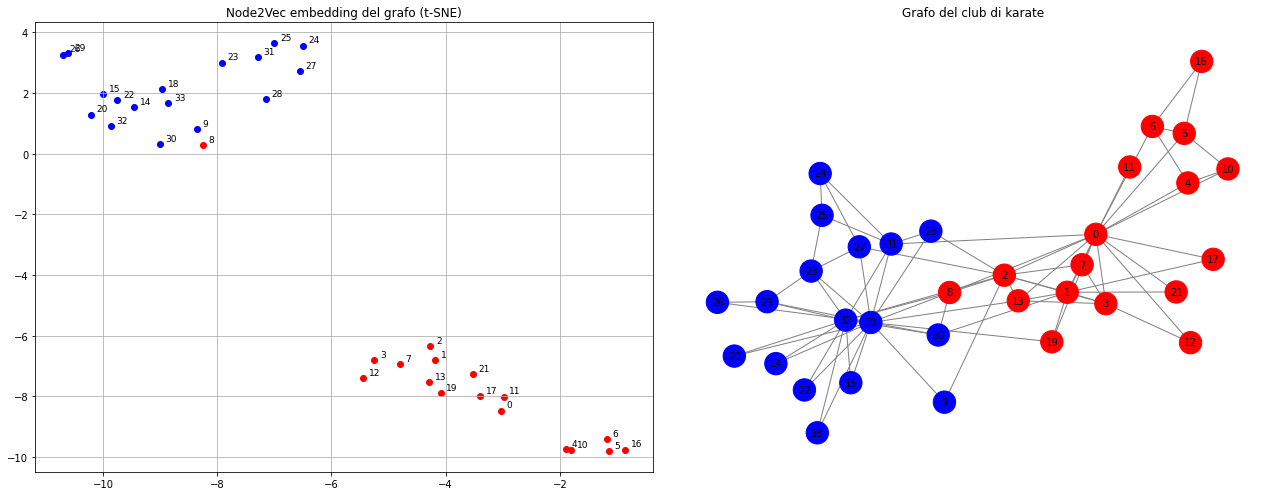

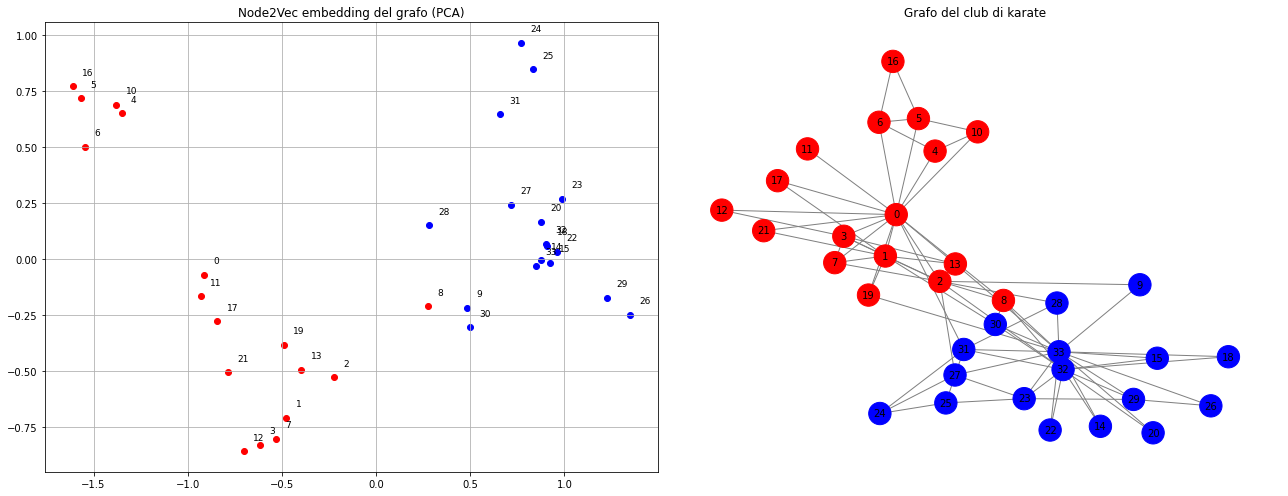

In [3]:
# Riduzione a 2D con TSNE e PCA per visualizzazione
tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(node_embeddings)/3))
embeddings_tsne = tsne.fit_transform(np.array(node_embeddings))

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(node_embeddings)


club_2d(embeddings_tsne, node_ids, G)
club_2d(embeddings_pca, node_ids, G)

# Sul grafo più piccolo (10 nodi)

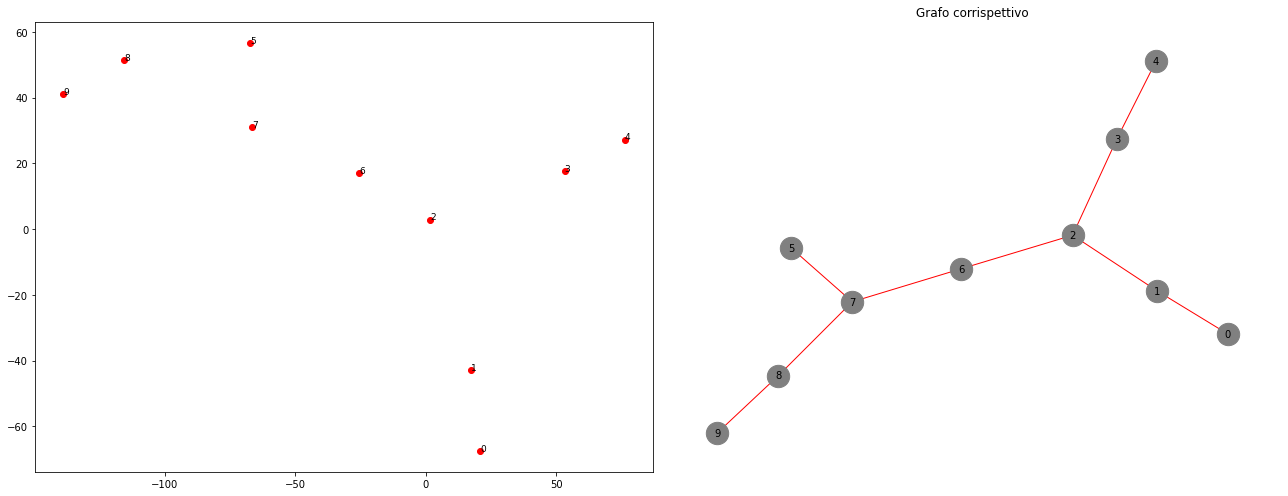

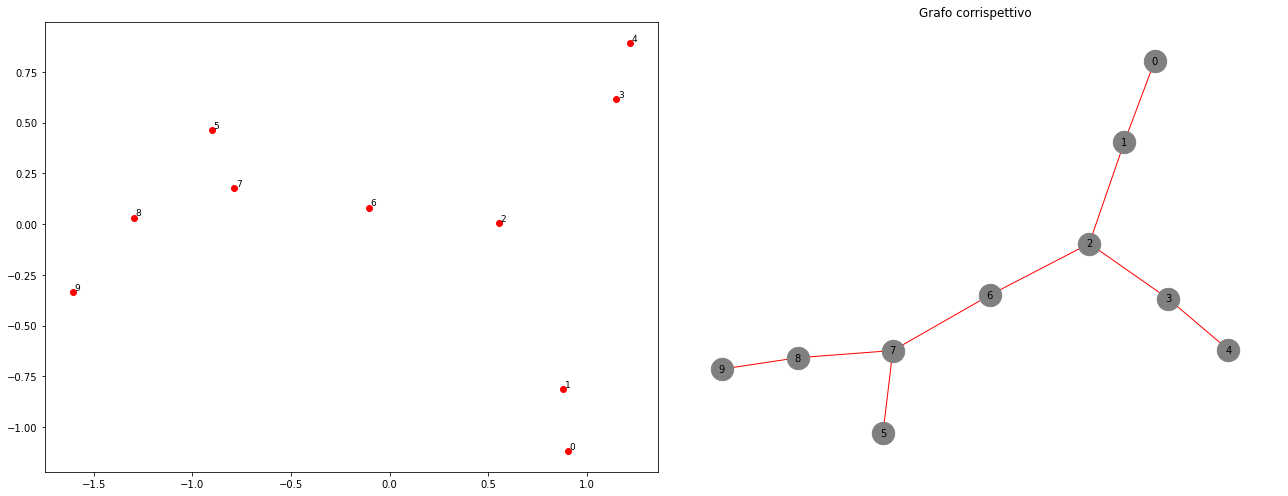

In [33]:
# Riduzione a 2D con TSNE e PCA per visualizzazione
tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(node_embeddings)/3))
embeddings_tsne = tsne.fit_transform(np.array(node_embeddings))

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(node_embeddings)


grafico_2d(embeddings_tsne, node_ids, G)
grafico_2d(embeddings_pca, node_ids, G)

# Confronto parametri su grafo più grande (EgoFacebook)

In [15]:
import urllib.request
import gzip
import networkx as nx

url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
urllib.request.urlretrieve(url, "facebook_combined.txt.gz")

with gzip.open("facebook_combined.txt.gz", 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

In [ ]:
import random

# Non uso il grafo completo perché troppo grande (4000+ nodi)
nodes_sample = random.sample(G.nodes(), 2000)
H = G.subgraph(nodes_sample).copy()

Computing transition probabilities:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.41it/s]


Computing transition probabilities:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:50<00:00,  2.00it/s]


Computing transition probabilities:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.16it/s]


Computing transition probabilities:   0%|          | 0/2000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


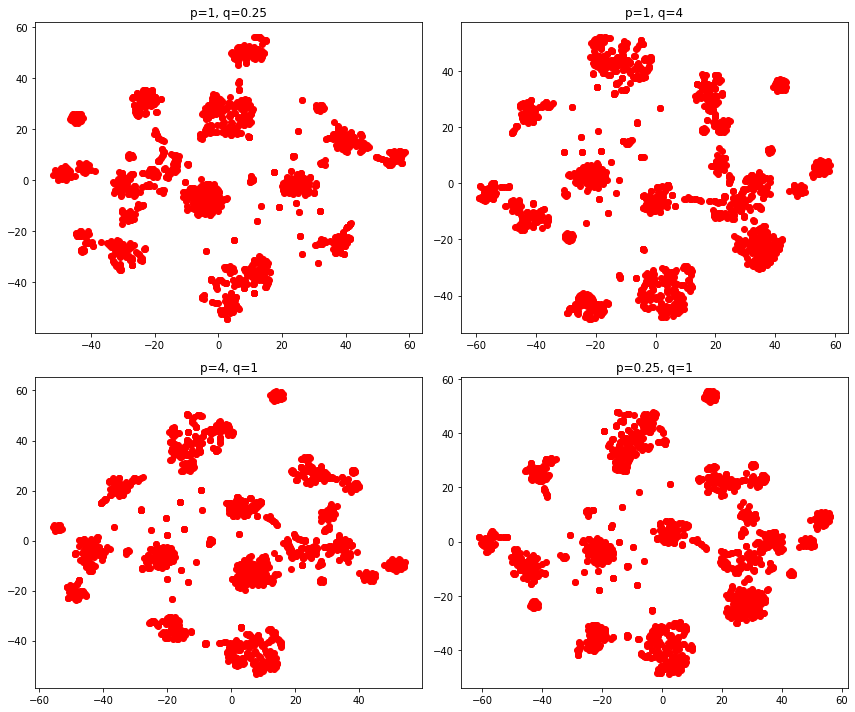

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

params = [(1, 0.25), (1, 4), (4, 1), (0.25, 1)]
titles = [f"p={p}, q={q}" for p, q in params]

for ax, (p, q), title in zip(axs.flatten(), params, titles):
    
    model = Node2Vec(H, dimensions=64, walk_length=10, num_walks=100, p=p, q=q, seed=42)
    model_w2v = model.fit(window=5, min_count=1)
    embeddings = {str(n): model_w2v.wv[str(n)] for n in H.nodes()}
    
    # t-SNE
    X = np.array([embeddings[str(node)] for node in H.nodes()])
    X_2d = TSNE(n_components=2, random_state=42).fit_transform(X)

    ax.scatter(X_2d[:, 0], X_2d[:, 1], c="red")
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Esempio su grafo grande

In [25]:
import networkx as nx

def stampa_TSNE(embedding, node_ids):
    tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(embedding)/3))
    embeddings_tsne = tsne.fit_transform(embedding)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    for i, (x, y) in zip(node_ids, embeddings_tsne):
        ax.scatter(x, y, color="red")
        ax.text(x + 0.1, y + 0.1, str(i), fontsize=9)
    ax.set_title("Node2Vec embedding del grafo (t-SNE)")
    ax.grid(True)

    plt.show()
    
def stampa_PCA(embedding, node_ids):
    pca = PCA(n_components=2)
    embeddings_pca = pca.fit_transform(embedding)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    
    for i, (x, y) in zip(node_ids, embeddings_pca):
        axes[0].scatter(x, y, color="blue")
        axes[0].text(x + 0.05, y + 0.05, str(i), fontsize=9)
    axes[0].set_title("Node2Vec embedding del grafo (PCA)")
    axes[0].grid(True)
    
    nx.draw(G, ax=axes[1], with_labels=True, node_color="red",
    node_size=500, font_size=10, edge_color='gray')
    axes[1].set_title("Grafo del club di karate")

    plt.tight_layout()
    plt.show()

### Link al dataset:
    https://networkrepository.com/soc-dolphins.php

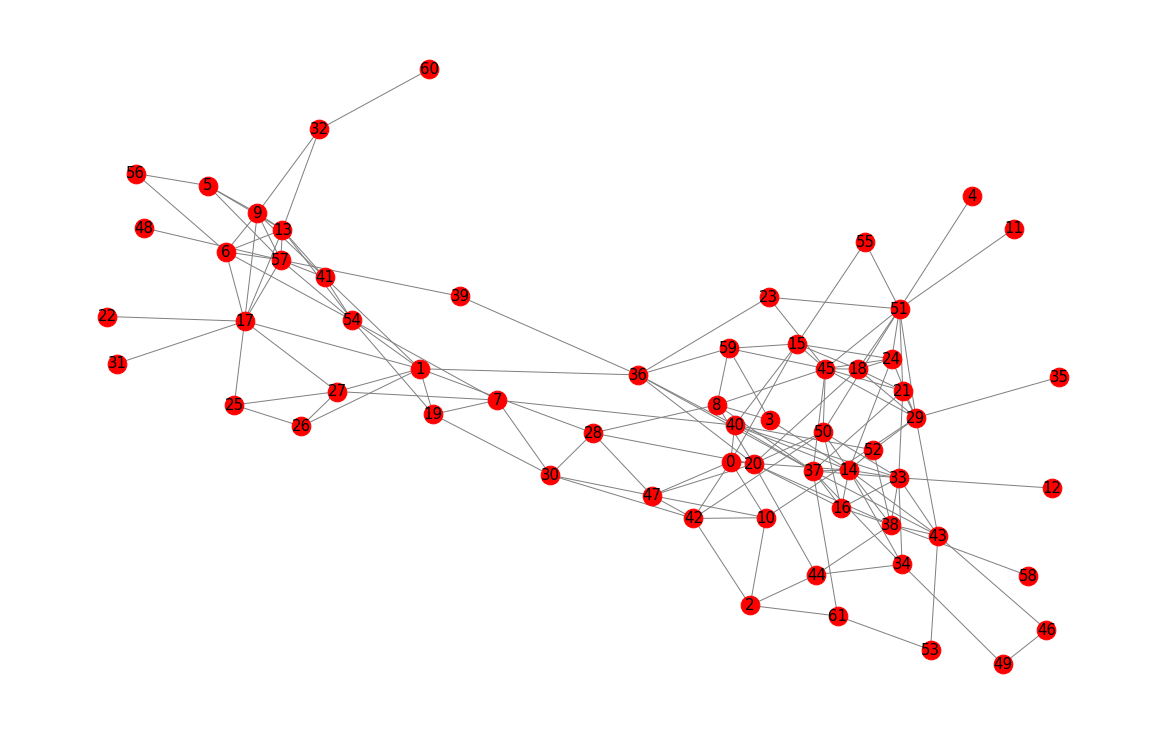

In [7]:
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from scipy.io import mmread
import networkx as nx

adj_matrix = mmread("dolphins.mtx").tocsr()

G = nx.from_scipy_sparse_array(adj_matrix)

nodes_subset = list(G.nodes())
H = G.subgraph(nodes_subset)

plt.figure(figsize=(16, 10))

nx.draw(G, with_labels=True, node_color="red", node_size=350, font_size=15, edge_color='gray')
plt.show()

In [14]:
# Crea i walk con Node2Vec
dim = 64
node2vec = Node2Vec(G, dimensions=dim, walk_length=20, num_walks=80, workers=2, p=1, q=3)

# Crea embeddings con gensim Word2Vec
walks = node2vec.walks
model = Word2Vec(sentences=walks, vector_size=dim, window=10, min_count=1, sg=1, seed=55, workers=2)

node_ids = list(G.nodes())
node_embeddings = [model.wv[str(n)] for n in node_ids]  # converti i nodi in stringhe

Computing transition probabilities:   0%|          | 0/62 [00:00<?, ?it/s]

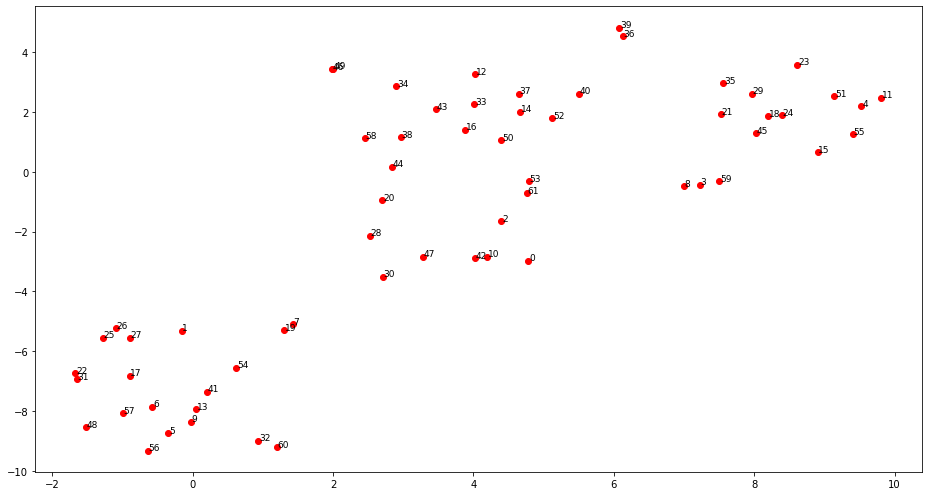

In [15]:
tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(node_embeddings)/3))
embeddings_tsne = tsne.fit_transform(np.array(node_embeddings))

grafico_2d(embeddings_tsne, node_ids, None)

# Esperimenti su dataset base stats Pokémon

### Link al dataset:
    https://www.kaggle.com/datasets/maca11/all-pokemon-dataset

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from node2vec import Node2Vec
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

df = pd.read_csv("All_Pokemon.csv")

colonne = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']
stats = df[colonne]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stats_norm = scaler.fit_transform(stats)

# matrice di similarità
sim_matrix = cosine_similarity(stats_norm)


G = nx.Graph()

for idx, name in enumerate(df['Name']):
    G.add_node(name)

# Soglia: metto arco se similarità > 0.95
threshold = 0.95

n = sim_matrix.shape[0]
for i in range(n):
    for j in range(i+1, n):
        if sim_matrix[i, j] >= threshold:
            G.add_edge(df.loc[i, 'Name'], df.loc[j, 'Name'], weight=float(sim_matrix[i, j]))

print(f"Numero di nodi: {G.number_of_nodes()}, archi: {G.number_of_edges()}")

Numero di nodi: 1032, archi: 3833


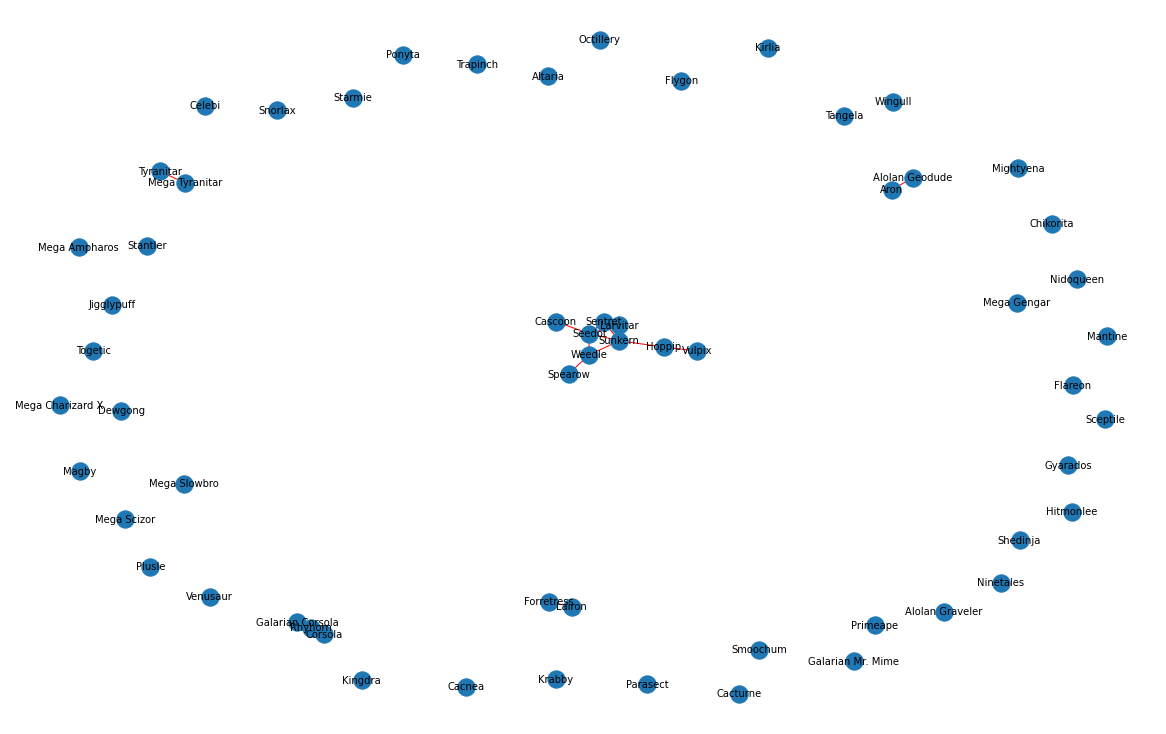

In [65]:
idx = np.random.choice(400, size=60, replace=False)

x = list(G.nodes())


nodes_subset = [x[i] for i in idx]
H = G.subgraph(nodes_subset)

plt.figure(figsize=(16, 10))
nx.draw(H, with_labels=True, node_size=300, font_size=10, edge_color="red")

In [6]:
dim = 64
node2vec = Node2Vec(G, dimensions=dim, walk_length=20, num_walks=80, workers=2, p=1, q=2)

# Crea embeddings con gensim Word2Vec
walks = node2vec.walks
model = Word2Vec(sentences=walks, vector_size=dim, window=10, min_count=1, sg=1, seed=55, workers=2)

node_ids = list(G.nodes())
node_embeddings = [model.wv[str(n)] for n in node_ids]  # converti i nodi in stringhe

Computing transition probabilities:   0%|          | 0/1032 [00:00<?, ?it/s]

In [74]:
nome = "Infernape"

print("Pokémon selezionato: ", nome)
valore = df[df['Name'] == nome][colonne]
print(valore)
print("\nPokémon con distribuzione statistiche simili:\n")
similar_nodes = model.wv.most_similar(nome, topn=10)
for name, value in similar_nodes:
    print(name, "\t", round(value, 4))
    valori = df[df["Name"]==name][colonne]
    print(valori, "\n---------------------------------")

Pokémon selezionato:  Infernape
     HP  Att  Def  Spa  Spd  Spe
470  76  104   71  104   71  108

Pokémon con distribuzione statistiche simili:

Thundurus 	 0.8831
     HP  Att  Def  Spa  Spd  Spe
742  79  115   70  125   80  111 
---------------------------------
Tornadus 	 0.8812
     HP  Att  Def  Spa  Spd  Spe
740  79  115   70  125   80  111 
---------------------------------
Mega Sceptile 	 0.8707
     HP  Att  Def  Spa  Spd  Spe
306  70  110   75  145   85  145 
---------------------------------
Simisear 	 0.8668
     HP  Att  Def  Spa  Spd  Spe
606  75   98   63   98   63  101 
---------------------------------
Greninja 	 0.8663
     HP  Att  Def  Spa  Spd  Spe
763  72   95   67  103   71  122 
---------------------------------
Simipour 	 0.8644
     HP  Att  Def  Spa  Spd  Spe
608  75   98   63   98   63  101 
---------------------------------
Azelf 	 0.8614
     HP  Att  Def  Spa  Spd  Spe
572  75  125   70  125   70  115 
---------------------------------
Ash-Greninja 	 0.8

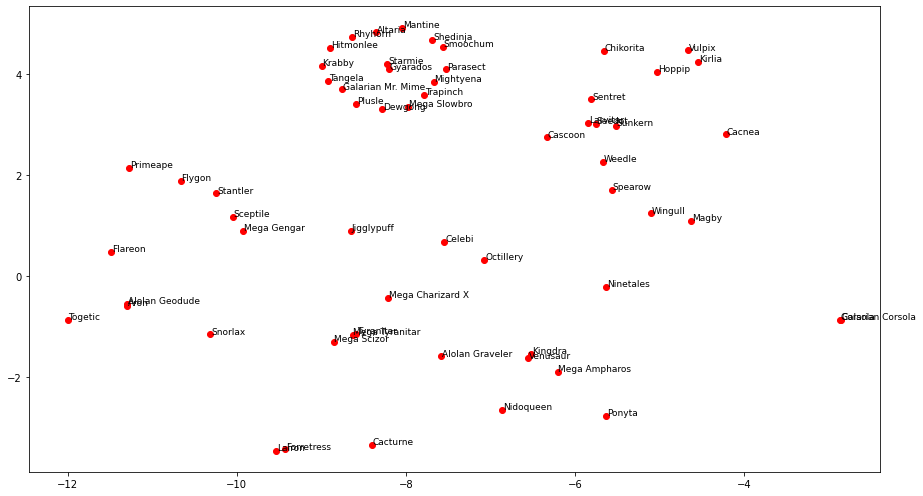

In [67]:
import random
# Riduzione a 2D con PCA e TSNE per visualizzazione
nb = [node_embeddings[i] for i in idx]
nd = [node_ids[i] for i in idx]

tsne = TSNE(n_components=2, random_state=55, perplexity=int(len(nb)/3))
embeddings_tsne = tsne.fit_transform(np.array(nb))

grafico_2d(embeddings_tsne, nd, None)